# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import joblib

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [31]:
# 2. Load Dataset
df = pd.read_csv('clustering_full.csv')

In [32]:
print("Daftar kolom dalam dataset:")
print(df.columns.tolist())

Daftar kolom dalam dataset:
['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'Cluster']


In [33]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
TransactionAmount      0
CustomerAge            0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
Cluster                0
dtype: int64


# **3. Data Splitting**

In [34]:
X = df.drop(columns=['Cluster'])
y = df['Cluster']

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [35]:
# Split data (train dan test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
print("\nJumlah Data Training:", len(X_train))
print("Jumlah Data Testing:", len(X_test))


Jumlah Data Training: 2009
Jumlah Data Testing: 503


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [37]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [39]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [42]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred_rf = rf_model.predict(X_test_scaled)

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [40]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

print("Evaluasi Model SVM:")
print(f"Akurasi: {svm_accuracy:.4f}")
print(f"F1-Score: {svm_f1:.4f}")
print("\nClassification Report SVM:\n")
print(classification_report(y_test, y_pred_svm))

Evaluasi Model SVM:
Akurasi: 0.9662
F1-Score: 0.9663

Classification Report SVM:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       219
           1       0.99      0.95      0.97       167
           2       0.93      0.97      0.95       117

    accuracy                           0.97       503
   macro avg       0.96      0.96      0.96       503
weighted avg       0.97      0.97      0.97       503



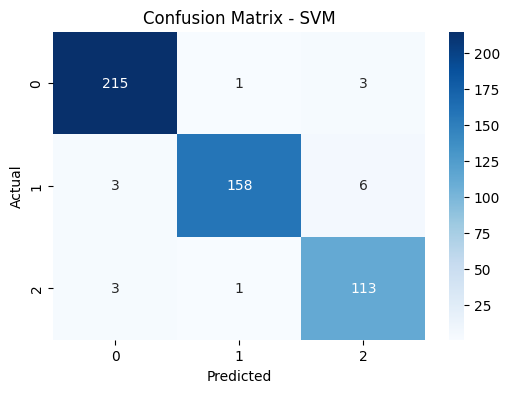

In [41]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [45]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print("Evaluasi Model Random Forest:")
print(f"Akurasi: {rf_accuracy:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print("\nClassification Report Random Forest:\n")
print(classification_report(y_test, y_pred_rf))

Evaluasi Model Random Forest:
Akurasi: 0.9602
F1-Score: 0.9602

Classification Report Random Forest:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       219
           1       0.98      0.94      0.96       167
           2       0.93      0.95      0.94       117

    accuracy                           0.96       503
   macro avg       0.96      0.96      0.96       503
weighted avg       0.96      0.96      0.96       503



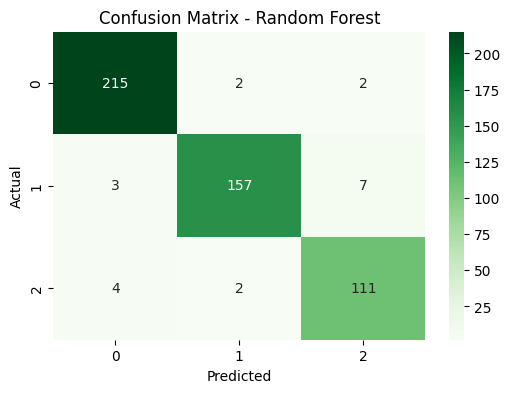

In [46]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model SVM, Random Forest, dan Scaler berhasil disimpan!")

Model SVM, Random Forest, dan Scaler berhasil disimpan!


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.